<a href="https://colab.research.google.com/github/thessafuzaro/Redes_Neurais/blob/main/RecurrentANN/LSTM_Recorrent_Neural_Network_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [31]:
'''
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
'''

'\nfrom tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.optimizers import SGD, Adam\n'

In [32]:
from keras.layers import Input, SimpleRNN, Dense, Flatten, LSTM
from keras.models import Sequential
from keras.optimizers import SGD, Adam

In [33]:
num = 200
series = np.sin(0.1*np.arange(num)+0.1*np.random.randn(num))

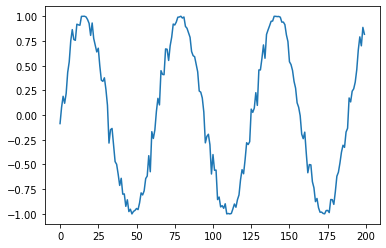

In [34]:
plt.plot(series)

In [35]:
P = 10 # period
D = 1
X = []
Y = []

for t in range(num-P):
  t_next = t+ P
  xx = series[t:t_next]
  X.append(xx)
  yy = series[t_next]
  Y.append(yy)

X = np.array(X).reshape(-1,P,1) # data NxDxP
Y = np.array(Y)
print('input shape',X.shape,'output shape',Y.shape )

input shape (190, 10, 1) output shape (190,)


In [36]:
X[0]

array([[-0.0860522 ],
       [ 0.0776715 ],
       [ 0.19011078],
       [ 0.1195234 ],
       [ 0.2187859 ],
       [ 0.43168968],
       [ 0.53845903],
       [ 0.75038016],
       [ 0.8646789 ],
       [ 0.76466081]])

In [37]:
N, cols, other = X.shape  #a ordem interfere, entao nao podemos embaralhar os dados
X_train = X[:-N//2]   #pega tudo até a metade de -N , tem que usar // para ser divisao inteira  e o - significa que pega de tras para frente
Y_train = Y[:-N//2]
X_test = X[-N//2:]
Y_test = Y[-N//2:]

In [38]:
model = Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(Input(shape=(P,1)))

# Add a simpleRNN layer with 5 internal units.
model.add(LSTM(5,'relu'))

# Add a Dense layer with 1 units.
model.add(Dense(1))  #a camada densa é 1 (linear) pq tem uma resposta

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='mse',optimizer=Adam(lr=0.1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [40]:
r = model.fit(X_train,Y_train,
              epochs=100, 
              validation_data = ( X_test ,Y_test ) )  #epochs é o numero de interaçoes

Epoch 1/100
3/3 [==============================] - 2s 254ms/step - loss: 0.3983 - val_loss: 0.1480
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 0.2379 - val_loss: 0.3459
Epoch 3/100
3/3 [==============================] - 0s 30ms/step - loss: 0.2820 - val_loss: 0.1912
Epoch 4/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1546 - val_loss: 0.1398
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1336 - val_loss: 0.1187
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0722 - val_loss: 0.0621
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0831 - val_loss: 0.0716
Epoch 8/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0677 - val_loss: 0.0306
Epoch 9/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0393 - val_loss: 0.0618
Epoch 10/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0413 - val_loss: 0.0244
Epoch 11/100
3/3 [

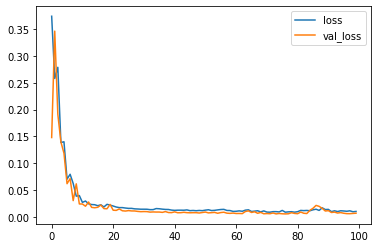

In [41]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

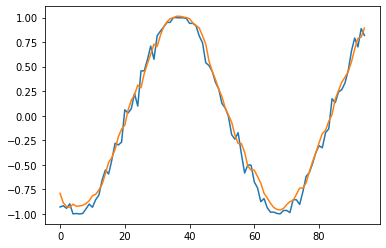

In [42]:
# this is a wrong way to do....
pred_Y = model.predict(X_test)
plt.plot(Y_test, label='prediction target')
plt.plot(pred_Y, label='prediction forecast')

In [43]:
pred_test = []
for xi in X_test:
  yi = model.predict(xi.reshape(1,-1,1))[0,0]
  pred_test.append(yi)

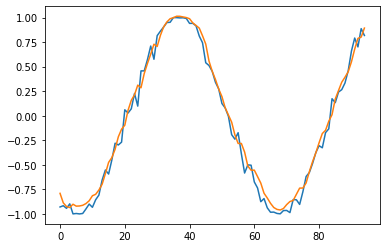

In [44]:
plt.plot(Y_test, label='prediction target')
plt.plot(pred_test, label='prediction forecast')

In [45]:
a,b = model.layers[1].get_weights()
print(a.shape,b.shape)

(5, 1) (1,)


In [46]:
print(a)
print('===============')
print(b)

[[ 0.22767185]
 [-0.43991017]
 [ 0.4666731 ]
 [-1.0519664 ]
 [-1.2759546 ]]
[1.118975]
